In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dftools

Welcome to JupyROOT 6.18/00


In [2]:
plt.style.use("cms")

In [3]:
df_data = pd.read_hdf("data/hists_qcd_estimation_lowermet.h5", "DataAggEvents")
df_mc = pd.read_hdf("data/hists_qcd_estimation_lowermet.h5", "MCAggEvents")
df_mc_jes = pd.read_hdf("data/hists_qcd_estimation_lowermet.h5", "MCAggEvents_jes")
df_mc_jer = pd.read_hdf("data/hists_qcd_estimation_lowermet.h5", "MCAggEvents_jer")
df_mc_unclust = pd.read_hdf("data/hists_qcd_estimation_lowermet.h5", "MCAggEvents_unclust")
df_mc_lepscales = pd.read_hdf("data/hists_qcd_estimation_lowermet.h5", "MCAggEvents_lepscales")
df_data.head(5)

count  \
table   varname0  varname1                  selection parent binvar0 binvar1           
central METnoX_pt NearestJetSelectionMET_pt Monojet   MET    100.0   40.0     7603.0   
                                                                     90.0     7734.0   
                                                                     140.0    6708.0   
                                                                     190.0    5832.0   
                                                                     240.0    2967.0   

                                                                               sum_w  \
table   varname0  varname1                  selection parent binvar0 binvar1           
central METnoX_pt NearestJetSelectionMET_pt Monojet   MET    100.0   40.0     7603.0   
                                                                     90.0     7734.0   
                                                                     140.0    6708.0   
                                                                     190.0    5832.0   
                                                                     240.0    2967.0   

                                                                              sum_ww  
table   varname0  varname1                  selection parent binvar0 binvar1          
central METnoX_pt NearestJetSelectionMET_pt Monojet   MET    100.0   40.0     7603.0  
                                                                     90.0     7734.0  
                                                                     140.0    6708.0  
                                                                     190.0    5832.0  
                                                                     240.0    2967.0

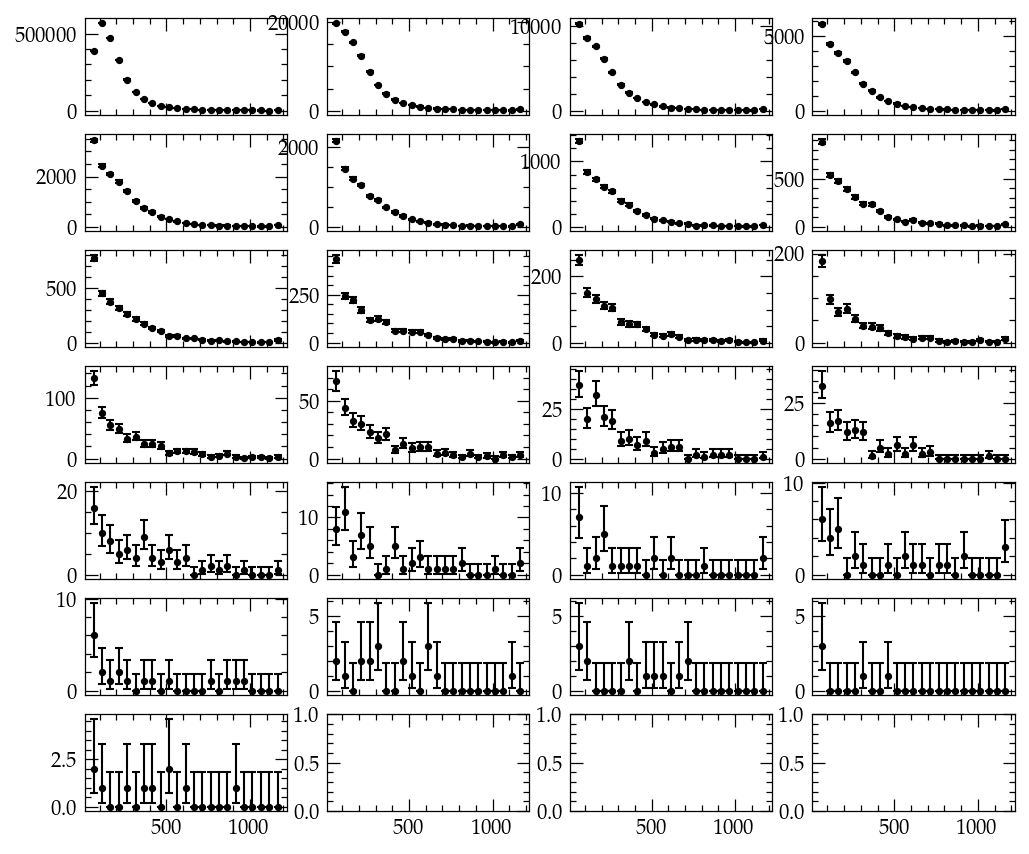

In [4]:
data = df_data.loc[("central", "METnoX_pt", "NearestJetSelectionMET_pt", "MonojetQCD", "MET"), :]

met_bins = np.array([
    #200, 250, 310, 370, 430, 510, 590, 690, 790, 900, 1020, 1160])
    200, 220, 250, 280, 310, 340, 370, 400, 430, 470,
    510, 550, 590, 640, 690, 740, 790, 840, 900, 960,
    1020, 1090, 1160, 1250, 1400,
])
data = dftools.transform.rebin(data, met_bins, label="binvar0").reorder_levels(["binvar0", "binvar1"]).sort_index()

nrows = len(met_bins)//4 + 1
fig, ax = plt.subplots(
    figsize=(8, nrows), dpi=150,
    ncols=4, nrows=nrows,
    sharex=True, sharey=False,
)

for idx, bval in enumerate(met_bins):
    bval = float(bval)
    tdata = data.loc[(bval,),"sum_w"]
    lower, upper = dftools.stats.poisson_interval(tdata)
    
    bin_low = tdata.index.get_level_values("binvar1").values
    bin_upp = np.array(list(bin_low[1:])+[2*bin_low[-1]-bin_low[-2]])
    
    nrow = idx//4
    ncol = idx%4
    ax[nrow, ncol].errorbar(
        (bin_low + bin_upp)/2.,
        tdata, yerr=(tdata-lower, upper-tdata),
        fmt='o', color='black',
    )

In [5]:
print("{} MB".format(df_data.memory_usage().sum()/(1024.**2)))
print("{} MB".format(df_mc.memory_usage().sum()/(1024.**2)))
print("{} MB".format(df_mc_jes.memory_usage().sum()/(1024.**2)))
print("{} MB".format(df_mc_jer.memory_usage().sum()/(1024.**2)))
print("{} MB".format(df_mc_unclust.memory_usage().sum()/(1024.**2)))
print("{} MB".format(df_mc_lepscales.memory_usage().sum()/(1024.**2)))

0.3245096206665039 MB
268.7039728164673 MB
27.01442813873291 MB
26.990288734436035 MB
26.994988441467285 MB
24.204514503479004 MB


In [6]:
met_bins = np.array([
    200, 220, 250, 280, 310, 340, 370, 400, 430, 470,
    510, 550, 590, 640, 690, 740, 790, 840, 900, #960,
    #1020, 1090, #1160, 1250, 1400,
    #200, 250, 310, 370, 430,
    #510, 590, 690, 790, 900,
    #1020, 1160,
])

jet_pt_bins = np.linspace(40., 1040., 11)

df_data = dftools.transform.rebin(df_data, met_bins, label="binvar0")
df_data = dftools.transform.rebin(df_data, jet_pt_bins, label="binvar1")
df_mc = dftools.transform.rebin(df_mc, met_bins, label="binvar0")
df_mc = dftools.transform.rebin(df_mc, jet_pt_bins, label="binvar1")
df_mc_jes = dftools.transform.rebin(df_mc_jes, met_bins, label="binvar0")
df_mc_jes = dftools.transform.rebin(df_mc_jes, jet_pt_bins, label="binvar1")
df_mc_jer = dftools.transform.rebin(df_mc_jer, met_bins, label="binvar0")
df_mc_jer = dftools.transform.rebin(df_mc_jer, jet_pt_bins, label="binvar1")
df_mc_unclust = dftools.transform.rebin(df_mc_unclust, met_bins, label="binvar0")
df_mc_unclust = dftools.transform.rebin(df_mc_unclust, jet_pt_bins, label="binvar1")
df_mc_lepscales = dftools.transform.rebin(df_mc_lepscales, met_bins, label="binvar0")
df_mc_lepscales = dftools.transform.rebin(df_mc_lepscales, jet_pt_bins, label="binvar1")

## Final binning

Use the final MET bins

In [7]:
_df_data = df_data.copy()

processes = {
    #"ZJetsToNuNu": ["ZJetsToNuNu"],
    "WJetsToLNu": [
        "WJetsToENu", "WJetsToMuNu", "WJetsToTauLNu", "WJetsToTauHNu",
        #"WJetsToEMinusNu", "WJetsToEPlusNu", "WJetsToMuMinusNu", "WJetsToMuPlusNu",
        #"WJetsToTauLMinusNu", "WJetsToTauLPlusNu", "WJetsToTauHMinusNu", "WJetsToTauHPlusNu",
    ],
    "MinorBkgs": [
        "Diboson", "EWKV2Jets", "G1Jet", "SingleTop", "TTJets", "VGamma",
        "DYJetsToEE", "DYJetsToMuMu", "DYJetsToTauHTauH", "DYJetsToTauHTauL", "DYJetsToTauLTauL",
    ],
    #"QCD": ["QCD"],
}

_df_mc = dftools.transform.merge(df_mc, processes)
_df_mc_jes = dftools.transform.merge(df_mc_jes, processes)
_df_mc_jer = dftools.transform.merge(df_mc_jer, processes)
_df_mc_unclust = dftools.transform.merge(df_mc_unclust, processes)
_df_mc_lepscales = dftools.transform.merge(df_mc_lepscales, processes)

In [8]:
_df_mc.index.get_level_values("parent").unique()

Index(['MinorBkgs', 'QCD', 'WJetsToLNu', 'ZJetsToNuNu'], dtype='object', name='parent')

In [9]:
def merge_query(df, label_queries, index_level="parent"):
    index_names = df.index.names
    tdf = df.reset_index()
    for label, query in label_queries.items():
        mask = tdf.eval(query)
        tdf.loc[mask, index_level] = label
    return tdf.groupby(index_names).sum()

queries = {"MinorBkgs": "(selection=='SingleElectronQCD') & (parent=='QCD')",}
_df_mc = merge_query(_df_mc, queries)
_df_mc_jes = merge_query(_df_mc_jes, queries)
_df_mc_jer = merge_query(_df_mc_jer, queries)
_df_mc_unclust = merge_query(_df_mc_unclust, queries)
_df_mc_lepscales = merge_query(_df_mc_lepscales, queries)

# Fits

## Setup

### Combine binvar0 into category

In [10]:
_df_data.index.get_level_values("binvar0").unique()

Int64Index([200, 220, 250, 280, 310, 340, 370, 400, 430, 470, 510, 550, 590,
            640, 690, 740, 790, 840, 900],
           dtype='int64', name='binvar0')

In [11]:
#_df_data = _df_data.reset_index(["selection", "binvar0"])
#_df_data["selection"] = _df_data["selection"] + "_" + _df_data["binvar0"].astype(int).astype(str)
#_df_data = _df_data.drop("binvar0", axis=1).set_index("selection", append=True).reorder_levels([
#    "table", "varname0", "varname1", "selection", "parent", "binvar1"
#]).sort_index()
#
#_df_mc = _df_mc.reset_index(["selection", "binvar0"])
#_df_mc["selection"] = _df_mc["selection"] + "_" + _df_mc["binvar0"].astype(int).astype(str)
#_df_mc = _df_mc.drop("binvar0", axis=1).set_index("selection", append=True).reorder_levels([
#    "table", "varname0", "varname1", "selection", "parent", "binvar1"
#]).sort_index()
#
#_df_mc_jes = _df_mc_jes.reset_index(["selection", "binvar0"])
#_df_mc_jes["selection"] = _df_mc_jes["selection"] + "_" + _df_mc_jes["binvar0"].astype(int).astype(str)
#_df_mc_jes = _df_mc_jes.drop("binvar0", axis=1).set_index("selection", append=True).reorder_levels([
#    "table", "varname0", "varname1", "selection", "parent", "binvar1"
#]).sort_index()
#
#_df_mc_jer = _df_mc_jer.reset_index(["selection", "binvar0"])
#_df_mc_jer["selection"] = _df_mc_jer["selection"] + "_" + _df_mc_jer["binvar0"].astype(int).astype(str)
#_df_mc_jer = _df_mc_jer.drop("binvar0", axis=1).set_index("selection", append=True).reorder_levels([
#    "table", "varname0", "varname1", "selection", "parent", "binvar1"
#]).sort_index()
#
#_df_mc_unclust = _df_mc_unclust.reset_index(["selection", "binvar0"])
#_df_mc_unclust["selection"] = _df_mc_unclust["selection"] + "_" + _df_mc_unclust["binvar0"].astype(int).astype(str)
#_df_mc_unclust = _df_mc_unclust.drop("binvar0", axis=1).set_index("selection", append=True).reorder_levels([
#    "table", "varname0", "varname1", "selection", "parent", "binvar1"
#]).sort_index()
#
#_df_mc_lepscales = _df_mc_lepscales.reset_index(["selection", "binvar0"])
#_df_mc_lepscales["selection"] = _df_mc_lepscales["selection"] + "_" + _df_mc_lepscales["binvar0"].astype(int).astype(str)
#_df_mc_lepscales = _df_mc_lepscales.drop("binvar0", axis=1).set_index("selection", append=True).reorder_levels([
#    "table", "varname0", "varname1", "selection", "parent", "binvar1"
#]).sort_index()

In [12]:
fit_input_path = "data/fit_inputs_19metbins_10jptbins_2d_v2.h5"
save = True

In [13]:
_df_data.head(5)

count  \
table   varname0  varname1                  selection parent binvar0 binvar1             
central METnoX_pt NearestJetSelectionMET_pt Monojet   MET    200     40.0     183761.0   
                                                                     140.0    213817.0   
                                                                     240.0     41816.0   
                                                                     340.0      8742.0   
                                                                     440.0      3441.0   

                                                                                 sum_w  \
table   varname0  varname1                  selection parent binvar0 binvar1             
central METnoX_pt NearestJetSelectionMET_pt Monojet   MET    200     40.0     183761.0   
                                                                     140.0    213817.0   
                                                                     240.0     41816.0   
                                                                     340.0      8742.0   
                                                                     440.0      3441.0   

                                                                                sum_ww  
table   varname0  varname1                  selection parent binvar0 binvar1            
central METnoX_pt NearestJetSelectionMET_pt Monojet   MET    200     40.0     183761.0  
                                                                     140.0    213817.0  
                                                                     240.0     41816.0  
                                                                     340.0      8742.0  
                                                                     440.0      3441.0

In [14]:
# Rebin
df_data_fit = _df_data.loc[("central", "METnoX_pt", "NearestJetSelectionMET_pt"),:]

df_data_fit = df_data_fit.reorder_levels(["binvar0", "binvar1", "selection", "parent"]).unstack().unstack().unstack()
df_data_fit["binvar0_max"] = np.array(list(met_bins[1:])+[2*met_bins[-1]-met_bins[-2]]).astype(float)
df_data_fit = df_data_fit.set_index("binvar0_max", append=True).stack().reorder_levels(["binvar1", "binvar0", "binvar0_max"]).unstack().unstack()
df_data_fit["binvar1_max"] = np.array(list(jet_pt_bins[1:])+[2*jet_pt_bins[-1]-jet_pt_bins[-2]]).astype(float)
df_data_fit = df_data_fit.set_index("binvar1_max", append=True).stack().stack().stack().stack().reorder_levels(["selection", "parent", "binvar0", "binvar0_max", "binvar1", "binvar1_max"]).sort_index()
df_data_fit.index.names = ["trigger", "region", "bin0_min", "bin0_max", "bin1_min", "bin1_max"]
df_data_fit = df_data_fit.reset_index("bin0_min")
df_data_fit["bin0_min"] = df_data_fit["bin0_min"].astype(float)
df_data_fit = df_data_fit.set_index("bin0_min", append=True).reorder_levels(["trigger", "region", "bin0_min", "bin0_max", "bin1_min", "bin1_max"]).sort_index()

# Save
if save:
    with pd.HDFStore(fit_input_path) as store:
        if "Data" in store.keys():
            store.remove("Data")
        store.put("Data", df_data_fit, format='table', append=True, complib='zlib', complevel=9)
df_data_fit.head(5)

count     sum_w  \
trigger region bin0_min bin0_max bin1_min bin1_max                       
Monojet MET    200.0    220.0    40.0     140.0     183761.0  183761.0   
                                 140.0    240.0     213817.0  213817.0   
                                 240.0    340.0      41816.0   41816.0   
                                 340.0    440.0       8742.0    8742.0   
                                 440.0    540.0       3441.0    3441.0   

                                                      sum_ww  
trigger region bin0_min bin0_max bin1_min bin1_max            
Monojet MET    200.0    220.0    40.0     140.0     183761.0  
                                 140.0    240.0     213817.0  
                                 240.0    340.0      41816.0  
                                 340.0    440.0       8742.0  
                                 440.0    540.0       3441.0

### MC PDFs

In [15]:
# rebin and merge processes
df_mc_pdf = _df_mc.loc[("central", "METnoX_pt", "NearestJetSelectionMET_pt"), (c for c in _df_mc.columns if "sum_w_lhePdf" in c)]
df_mc_pdf = df_mc_pdf.stack()
df_mc_pdf.index.names = ["selection", "parent", "binvar0", "binvar1", "variation"]
df_mc_pdf = df_mc_pdf.reset_index("variation")
df_mc_pdf.loc[:, "variation"] = df_mc_pdf["variation"].str.replace("sum_w_", "").str.replace("sum_ww_", "")
df_mc_pdf = df_mc_pdf.set_index("variation", append=True).unstack()
df_mc_pdf_std = df_mc_pdf.std(axis=1)

sumw = _df_mc.loc[("central", "METnoX_pt", "NearestJetSelectionMET_pt"), "sum_w"]
sumww = _df_mc.loc[("central", "METnoX_pt", "NearestJetSelectionMET_pt"), "sum_ww"]
df_mc_pdf = pd.DataFrame({
    "sum_w_lhePdfWeightUp": sumw + df_mc_pdf_std,
    "sum_ww_lhePdfWeightUp": sumww * (1 + df_mc_pdf_std/sumw)**2,
    "sum_w_lhePdfWeightDown": sumw - df_mc_pdf_std,
    "sum_ww_lhePdfWeightDown": sumww * (1 - df_mc_pdf_std/sumw)**2,
}, index=sumw.index)
df_mc_pdf.head(5)

sum_w_lhePdfWeightUp  \
selection parent    binvar0 binvar1                         
Monojet   MinorBkgs 200     40.0             13594.844153   
                            140.0            10071.318848   
                            240.0             2240.391210   
                            340.0              482.397411   
                            440.0              168.019147   

                                     sum_ww_lhePdfWeightUp  \
selection parent    binvar0 binvar1                          
Monojet   MinorBkgs 200     40.0              36721.353899   
                            140.0             17607.669524   
                            240.0              4347.902262   
                            340.0              1014.129441   
                            440.0               345.813453   

                                     sum_w_lhePdfWeightDown  \
selection parent    binvar0 binvar1                           
Monojet   MinorBkgs 200     40.0               13354.712554   
                            140.0               9886.381993   
                            240.0               2187.003712   
                            340.0                468.808168   
                            440.0                160.809644   

                                     sum_ww_lhePdfWeightDown  
selection parent    binvar0 binvar1                           
Monojet   MinorBkgs 200     40.0                35435.560606  
                            140.0               16966.957077  
                            240.0                4143.154159  
                            340.0                 957.797708  
                            440.0                 316.773260

### MC QCD Scales

In [16]:
df_mc_scale = _df_mc.loc[("central", "METnoX_pt", "NearestJetSelectionMET_pt"), (c for c in _df_mc.columns if "sum_w_lheScale" in c)]
df_mc_scale = df_mc_scale.stack()
df_mc_scale.index.names = ["selection", "parent", "binvar0", "binvar1", "variation"]
df_mc_scale = df_mc_scale.reset_index("variation")
df_mc_scale.loc[:, "variation"] = df_mc_scale["variation"].str.replace("sum_w_", "").str.replace("sum_ww_", "")
df_mc_scale = df_mc_scale.set_index("variation", append=True).unstack()
df_mc_scale_min = df_mc_scale.min(axis=1)
df_mc_scale_max = df_mc_scale.max(axis=1)

sumw = _df_mc.loc[("central", "METnoX_pt", "NearestJetSelectionMET_pt"), "sum_w"]
sumww = _df_mc.loc[("central", "METnoX_pt", "NearestJetSelectionMET_pt"), "sum_ww"]
df_mc_scale = pd.DataFrame({
    "sum_w_lheScaleWeightUp": df_mc_scale_max,
    "sum_ww_lheScaleWeightUp": sumww * (df_mc_scale_max/sumw)**2,
    "sum_w_lheScaleWeightDown": df_mc_scale_min,
    "sum_ww_lheScaleWeightDown": sumww * (df_mc_scale_min/sumw)**2,
}, index=sumw.index)
df_mc_scale.head(5)

sum_w_lheScaleWeightUp  \
selection parent    binvar0 binvar1                           
Monojet   MinorBkgs 200     40.0               14188.686260   
                            140.0              10510.185176   
                            240.0               2302.876559   
                            340.0                516.089152   
                            440.0                186.234497   

                                     sum_ww_lheScaleWeightUp  \
selection parent    binvar0 binvar1                            
Monojet   MinorBkgs 200     40.0                39999.502504   
                            140.0               19175.642441   
                            240.0                4593.813620   
                            340.0                1160.734558   
                            440.0                 424.858777   

                                     sum_w_lheScaleWeightDown  \
selection parent    binvar0 binvar1                             
Monojet   MinorBkgs 200     40.0                 12295.348022   
                            140.0                 9241.398452   
                            240.0                 2038.797318   
                            340.0                  424.508867   
                            440.0                  144.687294   

                                     sum_ww_lheScaleWeightDown  
selection parent    binvar0 binvar1                             
Monojet   MinorBkgs 200     40.0                  30036.676036  
                            140.0                 14825.337154  
                            240.0                  3600.643797  
                            340.0                   785.338676  
                            440.0                   256.439617

### MC Lepton scales

In [17]:
df_mc_leps = _df_mc_lepscales.loc[:,("sum_w", "sum_ww")].reorder_levels(["varname0", "varname1", "selection", "parent", "binvar0", "binvar1", "table"]).unstack()
df_mc_leps.columns = ["_".join(c) for c in df_mc_leps.columns]
df_mc_leps = df_mc_leps.loc[("METnoX_pt", "NearestJetSelectionMET_pt"),:].sort_index()
df_mc_leps.head(5)

sum_w_eleEnergyScaleDown  \
selection parent    binvar0 binvar1                             
Monojet   MinorBkgs 200     40.0                 13297.076034   
                            140.0                10095.408326   
                            240.0                 2265.511141   
                            340.0                  497.375088   
                            440.0                  181.337303   

                                     sum_w_eleEnergyScaleUp  \
selection parent    binvar0 binvar1                           
Monojet   MinorBkgs 200     40.0               12701.571934   
                            140.0               9680.056971   
                            240.0               2114.265922   
                            340.0                468.434421   
                            440.0                181.966621   

                                     sum_w_muonPtScaleDown  \
selection parent    binvar0 binvar1                          
Monojet   MinorBkgs 200     40.0              13259.107863   
                            140.0              9997.554193   
                            240.0              2228.826146   
                            340.0               478.307725   
                            440.0               173.938478   

                                     sum_w_muonPtScaleUp  \
selection parent    binvar0 binvar1                        
Monojet   MinorBkgs 200     40.0            12753.809983   
                            140.0            9653.297164   
                            240.0            2103.263653   
                            340.0             463.948805   
                            440.0             168.890919   

                                     sum_w_photonEnergyScaleDown  \
selection parent    binvar0 binvar1                                
Monojet   MinorBkgs 200     40.0                    13399.980611   
                            140.0                   10154.647190   
                            240.0                    2405.712713   
                            340.0                     510.099074   
                            440.0                     174.939965   

                                     sum_w_photonEnergyScaleUp  \
selection parent    binvar0 binvar1                              
Monojet   MinorBkgs 200     40.0                  12295.132049   
                            140.0                  9152.195777   
                            240.0                  2008.447853   
                            340.0                   441.417299   
                            440.0                   176.167840   

                                     sum_w_tauPtScaleDown  sum_w_tauPtScaleUp  \
selection parent    binvar0 binvar1                                             
Monojet   MinorBkgs 200     40.0             13279.823034        12736.927313   
                            140.0            10009.034664         9632.621630   
                            240.0             2235.962524         2104.608907   
                            340.0              475.085086          461.502000   
                            440.0              173.111677          170.663207   

                                     sum_ww_eleEnergyScaleDown  \
selection parent    binvar0 binvar1                              
Monojet   MinorBkgs 200     40.0                  35171.545662   
                            140.0                 17051.269954   
                            240.0                  4154.286279   
                            340.0                   965.274532   
                            440.0                   362.578052   

                                     sum_ww_eleEnergyScaleUp  \
selection parent    binvar0 binvar1                            
Monojet   MinorBkgs 200     40.0                34616.535728   
                            140.0               16969.872642   
                            240.0                4128.86

### MC JES Scales

In [18]:
df_mc_jesvari = _df_mc_jes.loc[:,("sum_w", "sum_ww")].reorder_levels(["varname0", "varname1", "selection", "parent", "binvar0", "binvar1", "table"]).unstack().loc[:,"sum_w"]

import scipy.special
x = np.sqrt(2)*scipy.special.erfinv(2*np.arange(0.1, 0.91, 0.1)-1)
    
def interpolate_errors(x, y, deg=3):
    results = np.polyval(
        np.polyfit(x, y, deg=deg),
        [-1., 1.],
    )
    return pd.Series({"up":results[1], "down":results[0]})

df_mc_jesvari = df_mc_jesvari.apply(lambda r: interpolate_errors(x, r), axis=1).loc[("METnoX_pt", "NearestJetSelectionMET_pt",),:]
df_mc_jesvari.columns = ["sum_w_jesTotalUp", "sum_w_jesTotalDown"]

sumw = _df_mc.loc[("central", "METnoX_pt", "NearestJetSelectionMET_pt"), "sum_w"]
sumww = _df_mc.loc[("central", "METnoX_pt", "NearestJetSelectionMET_pt"), "sum_ww"]

df_mc_jesvari["sum_ww_jesTotalUp"] = sumww*(df_mc_jesvari["sum_w_jesTotalUp"]/sumw)**2
df_mc_jesvari["sum_ww_jesTotalDown"] = sumww*(df_mc_jesvari["sum_w_jesTotalDown"]/sumw)**2
df_mc_jesvari = df_mc_jesvari[["sum_w_jesTotalUp", "sum_ww_jesTotalUp", "sum_w_jesTotalDown", "sum_ww_jesTotalDown"]].sort_index()
print(df_mc_jesvari.shape)
df_mc_jesvari.head(5)

(3971, 4)


sum_w_jesTotalUp  sum_ww_jesTotalUp  \
selection parent    binvar0 binvar1                                        
Monojet   MinorBkgs 200     40.0         13265.442376       34963.402774   
                            140.0         9870.022181       16910.850289   
                            240.0         2191.591074        4160.553382   
                            340.0          473.406727         976.680022   
                            440.0          185.104174         419.717190   

                                     sum_w_jesTotalDown  sum_ww_jesTotalDown  
selection parent    binvar0 binvar1                                           
Monojet   MinorBkgs 200     40.0           13568.210952         36577.615699  
                            140.0          10149.081936         17880.625401  
                            240.0           2342.368198          4752.721637  
                            340.0            489.955506          1046.156693  
                            440.0            190.922298           446.516628

### MC JER scales

In [19]:
df_mc_jervari = _df_mc_jer.loc[:,("sum_w", "sum_ww")].reorder_levels(["varname0", "varname1", "selection", "parent", "binvar0", "binvar1", "table"]).unstack().loc[:,"sum_w"]

import scipy.special
x = np.sqrt(2)*scipy.special.erfinv(2*np.arange(0.1, 0.91, 0.1)-1)
    
def interpolate_errors(x, y, deg=3):
    results = np.polyval(
        np.polyfit(x, y, deg=deg),
        [-1., 1.],
    )
    return pd.Series({"up":results[1], "down":results[0]})

df_mc_jervari = df_mc_jervari.apply(lambda r: interpolate_errors(x, r), axis=1).loc[("METnoX_pt", "NearestJetSelectionMET_pt"),:]
df_mc_jervari.columns = ["sum_w_jerSFUp", "sum_w_jerSFDown"]

sumw = _df_mc.loc[("central", "METnoX_pt", "NearestJetSelectionMET_pt"), "sum_w"]
sumww = _df_mc.loc[("central", "METnoX_pt", "NearestJetSelectionMET_pt"), "sum_ww"]

df_mc_jervari["sum_ww_jerSFUp"] = sumww*(df_mc_jervari["sum_w_jerSFUp"]/sumw)**2
df_mc_jervari["sum_ww_jerSFDown"] = sumww*(df_mc_jervari["sum_w_jerSFDown"]/sumw)**2
df_mc_jervari = df_mc_jervari[["sum_w_jerSFUp", "sum_ww_jerSFUp", "sum_w_jerSFDown", "sum_ww_jerSFDown"]].sort_index()
print(df_mc_jervari.shape)
df_mc_jervari.head(5)

(3971, 4)


sum_w_jerSFUp  sum_ww_jerSFUp  \
selection parent    binvar0 binvar1                                  
Monojet   MinorBkgs 200     40.0      13080.248429    33993.994780   
                            140.0      9788.615562    16633.043838   
                            240.0      2172.422399     4088.091397   
                            340.0       483.345081     1018.117869   
                            440.0       170.583241      356.448719   

                                     sum_w_jerSFDown  sum_ww_jerSFDown  
selection parent    binvar0 binvar1                                     
Monojet   MinorBkgs 200     40.0        13675.299606      37157.280261  
                            140.0       10266.877377      18298.097506  
                            240.0        2275.707403       4486.058135  
                            340.0         488.906174       1041.680411  
                            440.0         187.966348        432.797296

### MC Unclust

In [20]:
df_mc_unclustvari = _df_mc_unclust.loc[:,("sum_w", "sum_ww")].reorder_levels(["varname0", "varname1", "selection", "parent", "binvar0", "binvar1", "table"]).unstack().loc[:,"sum_w"]

import scipy.special
x = np.sqrt(2)*scipy.special.erfinv(2*np.arange(0.1, 0.91, 0.1)-1)
    
def interpolate_errors(x, y, deg=3):
    results = np.polyval(
        np.polyfit(x, y, deg=deg),
        [-1., 1.],
    )
    return pd.Series({"up":results[1], "down":results[0]})

df_mc_unclustvari = df_mc_unclustvari.apply(lambda r: interpolate_errors(x, r), axis=1).loc[("METnoX_pt", "NearestJetSelectionMET_pt"),:]
df_mc_unclustvari.columns = ["sum_w_unclustUp", "sum_w_unclustDown"]

sumw = _df_mc.loc[("central", "METnoX_pt", "NearestJetSelectionMET_pt"), "sum_w"]
sumww = _df_mc.loc[("central", "METnoX_pt", "NearestJetSelectionMET_pt"), "sum_ww"]

df_mc_unclustvari["sum_ww_unclustUp"] = sumww*(df_mc_unclustvari["sum_w_unclustUp"]/sumw)**2
df_mc_unclustvari["sum_ww_unclustDown"] = sumww*(df_mc_unclustvari["sum_w_unclustDown"]/sumw)**2
df_mc_unclustvari = df_mc_unclustvari[["sum_w_unclustUp", "sum_ww_unclustUp", "sum_w_unclustDown", "sum_ww_unclustDown"]].sort_index()
print(df_mc_unclustvari.shape)
df_mc_unclustvari.head(5)

(3971, 4)


sum_w_unclustUp  sum_ww_unclustUp  \
selection parent    binvar0 binvar1                                      
Monojet   MinorBkgs 200     40.0        13056.937712      33872.939235   
                            140.0        9826.980025      16763.678917   
                            240.0        2177.296614       4106.456695   
                            340.0         479.088169       1000.263325   
                            440.0         171.947074        362.171200   

                                     sum_w_unclustDown  sum_ww_unclustDown  
selection parent    binvar0 binvar1                                         
Monojet   MinorBkgs 200     40.0          13610.963537        36808.486423  
                            140.0         10164.581657        17935.281837  
                            240.0          2261.911054         4431.830059  
                            340.0           487.204526         1034.441848  
                            440.0           186.894619          427.876002

### MC Lumi variations

In [21]:
df_mc_lumi = pd.concat([
    _df_mc.loc[("central", "METnoX_pt", "NearestJetSelectionMET_pt"),("sum_w", "sum_ww")]*1.025,
    _df_mc.loc[("central", "METnoX_pt", "NearestJetSelectionMET_pt"),("sum_w", "sum_ww")]/1.025,
], axis=1)
df_mc_lumi.columns = ["sum_w_lumiUp", "sum_ww_lumiUp", "sum_w_lumiDown", "sum_ww_lumiDown"]
df_mc_lumi.head(5)

sum_w_lumiUp  sum_ww_lumiUp  \
selection parent    binvar0 binvar1                                
Monojet   MinorBkgs 200     40.0     13811.647812   36977.482842   
                            140.0    10228.321681   17717.974745   
                            240.0     2269.039897    4351.033749   
                            340.0      487.492859    1010.406441   
                            440.0      168.524756     339.412536   

                                     sum_w_lumiDown  sum_ww_lumiDown  
selection parent    binvar0 binvar1                                   
Monojet   MinorBkgs 200     40.0       13146.125223     35195.700504  
                            140.0       9735.463825     16864.223434  
                            240.0       2159.704840      4141.376561  
                            340.0        464.002722       961.719396  
                            440.0        160.404288       323.057738

### MC collect everything

In [22]:
# Convert variations from columns to index
df_mc_vari = _df_mc.loc[
    ("central", "METnoX_pt", "NearestJetSelectionMET_pt"),
    [c for c in _df_mc.columns if ("sum_w_" in c or "sum_ww_" in c) and "lhe" not in c]
].copy()

# Add other variations
df_mc_vari = pd.concat([df_mc_lumi, df_mc_vari, df_mc_pdf, df_mc_scale, df_mc_leps, df_mc_jesvari, df_mc_jervari, df_mc_unclustvari], axis=1)

df_mc_vari = df_mc_vari.stack()
df_mc_vari.index.names = ["selection", "parent", "binvar0", "binvar1", "variation"]
df_mc_vari = df_mc_vari.reset_index("variation")
df_mc_vari["quantity"] = "sum_w"
df_mc_vari.loc[df_mc_vari["variation"].str.startswith("sum_ww"), "quantity"] = "sum_ww"
df_mc_vari.loc[:,"variation"] = df_mc_vari["variation"].str.replace("sum_w_", "").str.replace("sum_ww_", "")
df_mc_vari = df_mc_vari.set_index(["variation", "quantity"], append=True).unstack()
df_mc_vari.columns = [c[1] for c in df_mc_vari.columns]
df_mc_vari = df_mc_vari.reorder_levels(["selection", "parent", "variation", "binvar0", "binvar1"]).sort_index()

# Add nominal
df_mc_nom = _df_mc.loc[("central", "METnoX_pt", "NearestJetSelectionMET_pt"), ("sum_w", "sum_ww")].copy()
df_mc_nom["variation"] = ""
df_mc_nom = df_mc_nom.set_index("variation", append=True).reorder_levels(["selection", "parent", "variation", "binvar0", "binvar1"]).sort_index()
df_mc_fit = pd.concat([df_mc_nom, df_mc_vari], axis=0)

# Rename
df_mc_fit = df_mc_fit.reorder_levels(["binvar0", "binvar1", "selection", "parent", "variation"]).unstack().unstack().unstack().unstack()
df_mc_fit["binvar0_max"] = np.array(list(met_bins[1:])+[2*met_bins[-1]-met_bins[-2]]).astype(float)
df_mc_fit = df_mc_fit.set_index("binvar0_max", append=True).stack().reorder_levels(["binvar1", "binvar0", "binvar0_max"]).unstack().unstack()
df_mc_fit["binvar1_max"] = np.array(list(jet_pt_bins[1:])+[2*jet_pt_bins[-1]-jet_pt_bins[-2]]).astype(float)
df_mc_fit = df_mc_fit.set_index("binvar1_max", append=True).stack().stack().stack().stack().stack().reorder_levels(["selection", "parent", "variation", "binvar0", "binvar0_max", "binvar1", "binvar1_max"]).sort_index()
df_mc_fit.index.names = ["region", "process", "variation", "bin0_min", "bin0_max", "bin1_min", "bin1_max"]
df_mc_fit = df_mc_fit.reset_index("bin0_min")
df_mc_fit["bin0_min"] = df_mc_fit["bin0_min"].astype(float)
df_mc_fit = df_mc_fit.set_index("bin0_min", append=True).reorder_levels(["region", "process", "variation", "bin0_min", "bin0_max", "bin1_min", "bin1_max"]).sort_index()

# Save
if save:
    with pd.HDFStore(fit_input_path) as store:
        if "MC" in store.keys():
            store.remove("MC")
        store.put("MC", df_mc_fit, format='table', append=True, complib='zlib', complevel=9)
df_mc_fit.head(5)

sum_w  \
region  process   variation bin0_min bin0_max bin1_min bin1_max                 
Monojet MinorBkgs           200.0    220.0    40.0     140.0     13474.778354   
                                              140.0    240.0      9978.850421   
                                              240.0    340.0      2213.697461   
                                              340.0    440.0       475.602790   
                                              440.0    540.0       164.414396   

                                                                       sum_ww  
region  process   variation bin0_min bin0_max bin1_min bin1_max                
Monojet MinorBkgs           200.0    220.0    40.0     140.0     36075.593016  
                                              140.0    240.0     17285.829019  
                                              240.0    340.0      4244.910975  
                                              340.0    440.0       985.762381  
                                              440.0    540.0       331.134182

### MC Smooth

In [23]:
nominal_mask = (df_mc_fit.index.get_level_values("variation")=="")
df_mc_fit_vari = df_mc_fit.loc[~nominal_mask].reset_index(["variation", "bin0_min", "bin0_max", "bin1_min", "bin1_max"])
df_mc_fit_vari["updown"] = "Up"
df_mc_fit_vari.loc[df_mc_fit_vari["variation"].str.endswith("Down"), "updown"] = "Down"
df_mc_fit_vari.loc[:, "variation"] = np.where(
    df_mc_fit_vari["variation"].str.endswith("Down"),
    df_mc_fit_vari["variation"].str.slice(0, -4),
    df_mc_fit_vari["variation"].str.slice(0, -2),
)
df_mc_fit_vari = df_mc_fit_vari.set_index(["variation", "bin0_min", "bin0_max", "bin1_min", "bin1_max", "updown"], append=True).unstack()
df_mc_fit_vari.columns = ["_".join(c) for c in df_mc_fit_vari.columns]

# add nominal values
df_mc_fit_vari = pd.merge(
    df_mc_fit_vari,
    df_mc_fit.loc[nominal_mask,:].reset_index("variation", drop=True),
    right_index=True, left_index=True,
)
df_mc_fit_vari["bin_cent"] = (df_mc_fit_vari.index.get_level_values("bin1_min")+df_mc_fit_vari.index.get_level_values("bin1_max"))/2.
df_mc_fit_vari["up_norm"] = df_mc_fit_vari.eval("sum_w_Up/sum_w")
df_mc_fit_vari["do_norm"] = df_mc_fit_vari.eval("sum_w_Down/sum_w")
df_mc_fit_vari["up_err"] = df_mc_fit_vari.eval("sqrt(abs(sum_ww_Up - sum_ww_Down))/sum_w")
df_mc_fit_vari["do_err"] = df_mc_fit_vari.eval("sqrt(abs(sum_ww_Down - sum_ww))/sum_w")

mask = (df_mc_fit_vari["sum_w"]==0.)
df_mc_fit_vari.loc[mask, "up_norm"] = 1.
df_mc_fit_vari.loc[mask, "do_norm"] = 1.
df_mc_fit_vari.loc[mask, "up_err"] = 100.
df_mc_fit_vari.loc[mask, "do_err"] = 100.

mask = (df_mc_fit_vari["do_err"]==0.)
df_mc_fit_vari.loc[mask, "do_err"] = df_mc_fit_vari.loc[mask, "up_err"].copy()

df_mc_fit_vari.loc[:, "up_err"] = np.maximum(1e-4, np.minimum(1., df_mc_fit_vari["up_err"]))
df_mc_fit_vari.loc[:, "do_err"] = np.maximum(1e-4, np.minimum(1., df_mc_fit_vari["do_err"]))

def smoother(df):
    return pd.DataFrame({
        "upsmooth": dftools.smooth.unispline_to_gausfilter(
            df["bin_cent"].values, df["up_norm"].values, w=1./df["up_err"],
            filter_kw={"sigma": 1},
            spline_kw={"k": 2, "s": df.shape[0]*4},
        ),
        "dosmooth": dftools.smooth.unispline_to_gausfilter(
            df["bin_cent"].values, df["do_norm"].values, w=1./df["do_err"],
            filter_kw={"sigma": 1},
            spline_kw={"k": 2, "s": df.shape[0]*4},
        ),
    }, index=df.index)

df_mc_fit_vari = pd.concat([
    df_mc_fit_vari,
    df_mc_fit_vari.groupby(["region", "process", "variation", "bin0_min", "bin0_max"]).apply(smoother)
], axis=1)
df_mc_fit_vari["sum_w_upsmooth"] = df_mc_fit_vari.eval("sum_w*upsmooth")
df_mc_fit_vari["sum_w_dosmooth"] = df_mc_fit_vari.eval("sum_w*dosmooth")
df_mc_fit_vari_sum = df_mc_fit_vari[["sum_w", "sum_w_Up", "sum_w_Down", "sum_w_upsmooth", "sum_w_dosmooth"]].groupby(["region", "process", "variation", "bin0_min", "bin0_max"]).sum()

df_mc_fit_vari = df_mc_fit_vari.reorder_levels(["region", "process", "variation", "bin0_min", "bin0_max", "bin1_min", "bin1_max"]).sort_index()
sum_w_up = df_mc_fit_vari.eval("sum_w*upsmooth").multiply(df_mc_fit_vari_sum.eval("sum_w_Up/sum_w_upsmooth"))
sum_w_do = df_mc_fit_vari.eval("sum_w*dosmooth").multiply(df_mc_fit_vari_sum.eval("sum_w_Down/sum_w_dosmooth"))

df_mc_fit_vari = pd.DataFrame({
    "sum_wUp": sum_w_up.values,
    "sum_wwUp": df_mc_fit_vari["sum_ww_Up"].values,
    "sum_wDown": sum_w_do.values,
    "sum_wwDown": df_mc_fit_vari["sum_ww_Down"].values,
}, index=df_mc_fit_vari.index)

df_mc_fit_vari.columns.name = "type"
df_mc_fit_vari = df_mc_fit_vari.stack().reset_index(["variation", "type"])
df_mc_fit_vari.loc[:, "variation"] = np.where(
    df_mc_fit_vari["type"].str.endswith("Up"),
    df_mc_fit_vari["variation"]+"Up",
    df_mc_fit_vari["variation"]+"Down",
)
df_mc_fit_vari.loc[:, "type"] = np.where(
    df_mc_fit_vari["type"].str.endswith("Up"),
    df_mc_fit_vari["type"].str.slice(0, -2),
    df_mc_fit_vari["type"].str.slice(0, -4),
)
df_mc_fit_vari = df_mc_fit_vari.set_index(["variation", "type"], append=True).unstack().reorder_levels([
    "region", "process", "variation", "bin0_min", "bin0_max", "bin1_min", "bin1_max",
]).sort_index()
df_mc_fit_vari.columns = [c[1] for c in df_mc_fit_vari.columns]

# Add nominal
df_mc_nom = _df_mc.loc[("central", "METnoX_pt", "NearestJetSelectionMET_pt"), ("sum_w", "sum_ww")].copy()
df_mc_nom["variation"] = ""
df_mc_nom = df_mc_nom.set_index("variation", append=True).reorder_levels(["selection", "parent", "variation", "binvar0", "binvar1"]).sort_index()

df_mc_nom = df_mc_nom.reorder_levels(["binvar0", "binvar1", "selection", "parent", "variation"]).unstack().unstack().unstack().unstack()
df_mc_nom["binvar0_max"] = np.array(list(met_bins[1:])+[2*met_bins[-1]-met_bins[-2]]).astype(float)
df_mc_nom = df_mc_nom.set_index("binvar0_max", append=True).stack().reorder_levels(["binvar1", "binvar0", "binvar0_max"]).unstack().unstack()
df_mc_nom["binvar1_max"] = np.array(list(jet_pt_bins[1:])+[2*jet_pt_bins[-1]-jet_pt_bins[-2]]).astype(float)
df_mc_nom = df_mc_nom.set_index("binvar1_max", append=True).stack().stack().stack().stack().stack().reorder_levels(["selection", "parent", "variation", "binvar0", "binvar0_max", "binvar1", "binvar1_max"]).sort_index()
df_mc_nom.index.names = ["region", "process", "variation", "bin0_min", "bin0_max", "bin1_min", "bin1_max"]
df_mc_nom = df_mc_nom.reset_index("bin0_min")
df_mc_nom["bin0_min"] = df_mc_nom["bin0_min"].astype(float)
df_mc_nom = df_mc_nom.set_index("bin0_min", append=True).reorder_levels(["region", "process", "variation", "bin0_min", "bin0_max", "bin1_min", "bin1_max"]).sort_index()
df_mc_fit_smooth = pd.concat([df_mc_nom, df_mc_fit_vari], axis=0, sort=True).fillna(0.)

# Save
name = "MCSmooth"
if save:
    with pd.HDFStore(fit_input_path) as store:
        if name in store.keys():
            store.remove(name)
        store.put(name, df_mc_fit_smooth, format='table', append=True, complib='zlib', complevel=9)
df_mc_fit_smooth.head(5)

/home/hep/sdb15/miniconda2/envs/zinv37/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:227: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


sum_w  \
region  process   variation bin0_min bin0_max bin1_min bin1_max                 
Monojet MinorBkgs           200.0    220.0    40.0     140.0     13474.778354   
                                              140.0    240.0      9978.850421   
                                              240.0    340.0      2213.697461   
                                              340.0    440.0       475.602790   
                                              440.0    540.0       164.414396   

                                                                       sum_ww  
region  process   variation bin0_min bin0_max bin1_min bin1_max                
Monojet MinorBkgs           200.0    220.0    40.0     140.0     36075.593016  
                                              140.0    240.0     17285.829019  
                                              240.0    340.0      4244.910975  
                                              340.0    440.0       985.762381  
                                              440.0    540.0       331.134182

In [24]:
nominal_mask = (df_mc_fit.index.get_level_values("variation")=="")
df_mc_fit_vari = df_mc_fit.loc[~nominal_mask].reset_index(["variation", "bin0_min", "bin0_max", "bin1_min", "bin1_max"])
df_mc_fit_vari["updown"] = "Up"
df_mc_fit_vari.loc[df_mc_fit_vari["variation"].str.endswith("Down"), "updown"] = "Down"
df_mc_fit_vari.loc[:, "variation"] = np.where(
    df_mc_fit_vari["variation"].str.endswith("Down"),
    df_mc_fit_vari["variation"].str.slice(0, -4),
    df_mc_fit_vari["variation"].str.slice(0, -2),
)
df_mc_fit_vari = df_mc_fit_vari.set_index(["variation", "bin0_min", "bin0_max", "bin1_min", "bin1_max", "updown"], append=True).unstack()
df_mc_fit_vari.columns = ["_".join(c) for c in df_mc_fit_vari.columns]

# add nominal values
df_mc_fit_vari = pd.merge(
    df_mc_fit_vari,
    df_mc_fit.loc[nominal_mask,:].reset_index("variation", drop=True),
    right_index=True, left_index=True,
)
df_mc_fit_vari["bin_cent"] = (df_mc_fit_vari.index.get_level_values("bin1_min")+df_mc_fit_vari.index.get_level_values("bin1_max"))/2.
df_mc_fit_vari["up_norm"] = df_mc_fit_vari.eval("sum_w_Up/sum_w")
df_mc_fit_vari["do_norm"] = df_mc_fit_vari.eval("sum_w_Down/sum_w")
df_mc_fit_vari["up_err"] = df_mc_fit_vari.eval("sqrt(abs(sum_ww_Up - sum_ww_Down))/sum_w")
df_mc_fit_vari["do_err"] = df_mc_fit_vari.eval("sqrt(abs(sum_ww_Down - sum_ww))/sum_w")

mask = (df_mc_fit_vari["sum_w"]==0.)
df_mc_fit_vari.loc[mask, "up_norm"] = 1.
df_mc_fit_vari.loc[mask, "do_norm"] = 1.
df_mc_fit_vari.loc[mask, "up_err"] = 100.
df_mc_fit_vari.loc[mask, "do_err"] = 100.

mask = (df_mc_fit_vari["do_err"]==0.)
df_mc_fit_vari.loc[mask, "do_err"] = df_mc_fit_vari.loc[mask, "up_err"].copy()

df_mc_fit_vari.loc[:, "up_err"] = np.maximum(1e-4, np.minimum(1., df_mc_fit_vari["up_err"]))
df_mc_fit_vari.loc[:, "do_err"] = np.maximum(1e-4, np.minimum(1., df_mc_fit_vari["do_err"]))

def smoother(df):
    return pd.DataFrame({
        "upsmooth": dftools.smooth.unispline_to_gausfilter(
            df["bin_cent"].values, df["up_norm"].values, w=1./df["up_err"]**2,
            filter_kw={"sigma": 1},
            spline_kw={"k": 2, "s": df.shape[0]*4},
        ),
        "dosmooth": dftools.smooth.unispline_to_gausfilter(
            df["bin_cent"].values, df["do_norm"].values, w=1./df["do_err"]**2,
            filter_kw={"sigma": 1},
            spline_kw={"k": 2, "s": df.shape[0]*4},
        ),
    }, index=df.index)

df_mc_fit_vari = pd.concat([
    df_mc_fit_vari,
    df_mc_fit_vari.groupby(["region", "process", "variation", "bin0_min", "bin0_max"]).apply(smoother)
], axis=1)
df_mc_fit_vari["sum_w_upsmooth"] = df_mc_fit_vari.eval("sum_w*upsmooth")
df_mc_fit_vari["sum_w_dosmooth"] = df_mc_fit_vari.eval("sum_w*dosmooth")
df_mc_fit_vari_sum = df_mc_fit_vari[["sum_w", "sum_w_Up", "sum_w_Down", "sum_w_upsmooth", "sum_w_dosmooth"]].groupby(["region", "process", "variation", "bin0_min", "bin0_max"]).sum()

df_mc_fit_vari = df_mc_fit_vari.reorder_levels(["region", "process", "variation", "bin0_min", "bin0_max", "bin1_min", "bin1_max"]).sort_index()
sum_w_up = df_mc_fit_vari.eval("sum_w*upsmooth").multiply(df_mc_fit_vari_sum.eval("sum_w_Up/sum_w_upsmooth"))
sum_w_do = df_mc_fit_vari.eval("sum_w*dosmooth").multiply(df_mc_fit_vari_sum.eval("sum_w_Down/sum_w_dosmooth"))

df_mc_fit_vari = pd.DataFrame({
    "sum_wUp": sum_w_up.values,
    "sum_wwUp": df_mc_fit_vari["sum_ww_Up"].values,
    "sum_wDown": sum_w_do.values,
    "sum_wwDown": df_mc_fit_vari["sum_ww_Down"].values,
}, index=df_mc_fit_vari.index)

df_mc_fit_vari.columns.name = "type"
df_mc_fit_vari = df_mc_fit_vari.stack().reset_index(["variation", "type"])
df_mc_fit_vari.loc[:, "variation"] = np.where(
    df_mc_fit_vari["type"].str.endswith("Up"),
    df_mc_fit_vari["variation"]+"Up",
    df_mc_fit_vari["variation"]+"Down",
)
df_mc_fit_vari.loc[:, "type"] = np.where(
    df_mc_fit_vari["type"].str.endswith("Up"),
    df_mc_fit_vari["type"].str.slice(0, -2),
    df_mc_fit_vari["type"].str.slice(0, -4),
)
df_mc_fit_vari = df_mc_fit_vari.set_index(["variation", "type"], append=True).unstack().reorder_levels([
    "region", "process", "variation", "bin0_min", "bin0_max", "bin1_min", "bin1_max",
]).sort_index()
df_mc_fit_vari.columns = [c[1] for c in df_mc_fit_vari.columns]

# Add nominal
df_mc_nom = _df_mc.loc[("central", "METnoX_pt", "NearestJetSelectionMET_pt"), ("sum_w", "sum_ww")].copy()
df_mc_nom["variation"] = ""
df_mc_nom = df_mc_nom.set_index("variation", append=True).reorder_levels(["selection", "parent", "variation", "binvar0", "binvar1"]).sort_index()

df_mc_nom = df_mc_nom.reorder_levels(["binvar0", "binvar1", "selection", "parent", "variation"]).unstack().unstack().unstack().unstack()
df_mc_nom["binvar0_max"] = np.array(list(met_bins[1:])+[2*met_bins[-1]-met_bins[-2]]).astype(float)
df_mc_nom = df_mc_nom.set_index("binvar0_max", append=True).stack().reorder_levels(["binvar1", "binvar0", "binvar0_max"]).unstack().unstack()
df_mc_nom["binvar1_max"] = np.array(list(jet_pt_bins[1:])+[2*jet_pt_bins[-1]-jet_pt_bins[-2]]).astype(float)
df_mc_nom = df_mc_nom.set_index("binvar1_max", append=True).stack().stack().stack().stack().stack().reorder_levels(["selection", "parent", "variation", "binvar0", "binvar0_max", "binvar1", "binvar1_max"]).sort_index()
df_mc_nom.index.names = ["region", "process", "variation", "bin0_min", "bin0_max", "bin1_min", "bin1_max"]
df_mc_nom = df_mc_nom.reset_index("bin0_min")
df_mc_nom["bin0_min"] = df_mc_nom["bin0_min"].astype(float)
df_mc_nom = df_mc_nom.set_index("bin0_min", append=True).reorder_levels(["region", "process", "variation", "bin0_min", "bin0_max", "bin1_min", "bin1_max"]).sort_index()
df_mc_fit_smooth = pd.concat([df_mc_nom, df_mc_fit_vari], axis=0, sort=True).fillna(0.)

# Save
name = "MCSmoothv2"
if save:
    with pd.HDFStore(fit_input_path) as store:
        if name in store.keys():
            store.remove(name)
        store.put(name, df_mc_fit_smooth, format='table', append=True, complib='zlib', complevel=9)
df_mc_fit_smooth.head(5)

/home/hep/sdb15/miniconda2/envs/zinv37/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:227: UserWarning: 
A theoretically impossible result was found during the iteration
process for finding a smoothing spline with fp = s: s too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


sum_w  \
region  process   variation bin0_min bin0_max bin1_min bin1_max                 
Monojet MinorBkgs           200.0    220.0    40.0     140.0     13474.778354   
                                              140.0    240.0      9978.850421   
                                              240.0    340.0      2213.697461   
                                              340.0    440.0       475.602790   
                                              440.0    540.0       164.414396   

                                                                       sum_ww  
region  process   variation bin0_min bin0_max bin1_min bin1_max                
Monojet MinorBkgs           200.0    220.0    40.0     140.0     36075.593016  
                                              140.0    240.0     17285.829019  
                                              240.0    340.0      4244.910975  
                                              340.0    440.0       985.762381  
                                              440.0    540.0       331.134182

### MC Smooth - polyfit

In [25]:
nominal_mask = (df_mc_fit.index.get_level_values("variation")=="")
df_mc_fit_vari = df_mc_fit.loc[~nominal_mask].reset_index(["variation", "bin0_min", "bin0_max", "bin1_min", "bin1_max"])
df_mc_fit_vari["updown"] = "Up"
df_mc_fit_vari.loc[df_mc_fit_vari["variation"].str.endswith("Down"), "updown"] = "Down"
df_mc_fit_vari.loc[:, "variation"] = np.where(
    df_mc_fit_vari["variation"].str.endswith("Down"),
    df_mc_fit_vari["variation"].str.slice(0, -4),
    df_mc_fit_vari["variation"].str.slice(0, -2),
)
df_mc_fit_vari = df_mc_fit_vari.set_index(["variation", "bin0_min", "bin0_max", "bin1_min", "bin1_max", "updown"], append=True).unstack()
df_mc_fit_vari.columns = ["_".join(c) for c in df_mc_fit_vari.columns]

# add nominal values
df_mc_fit_vari = pd.merge(
    df_mc_fit_vari,
    df_mc_fit.loc[nominal_mask,:].reset_index("variation", drop=True),
    right_index=True, left_index=True,
)
df_mc_fit_vari["bin_cent"] = (df_mc_fit_vari.index.get_level_values("bin1_min")+df_mc_fit_vari.index.get_level_values("bin1_max"))/2.
df_mc_fit_vari["up_norm"] = df_mc_fit_vari.eval("sum_w_Up/sum_w")
df_mc_fit_vari["do_norm"] = df_mc_fit_vari.eval("sum_w_Down/sum_w")
df_mc_fit_vari["up_err"] = df_mc_fit_vari.eval("sqrt(abs(sum_ww_Up - sum_ww_Down))/sum_w")
df_mc_fit_vari["do_err"] = df_mc_fit_vari.eval("sqrt(abs(sum_ww_Down - sum_ww))/sum_w")

mask = (df_mc_fit_vari["sum_w"]==0.)
df_mc_fit_vari.loc[mask, "up_norm"] = 1.
df_mc_fit_vari.loc[mask, "do_norm"] = 1.
df_mc_fit_vari.loc[mask, "up_err"] = 100.
df_mc_fit_vari.loc[mask, "do_err"] = 100.

mask = (df_mc_fit_vari["do_err"]==0.)
df_mc_fit_vari.loc[mask, "do_err"] = df_mc_fit_vari.loc[mask, "up_err"].copy()

df_mc_fit_vari.loc[:, "up_err"] = np.maximum(1e-4, np.minimum(1., df_mc_fit_vari["up_err"]))
df_mc_fit_vari.loc[:, "do_err"] = np.maximum(1e-4, np.minimum(1., df_mc_fit_vari["do_err"]))

def polyfit(x, y, err, deg=4):
    return np.polyval(np.polyfit(x, y, w=1/err, deg=deg), x)

df_mc_fit_vari = pd.concat([
    df_mc_fit_vari,
    df_mc_fit_vari.groupby(["region", "process", "variation", "bin0_min", "bin0_max"]).apply(smoother)
], axis=1)
df_mc_fit_vari["sum_w_upsmooth"] = df_mc_fit_vari.eval("sum_w*upsmooth")
df_mc_fit_vari["sum_w_dosmooth"] = df_mc_fit_vari.eval("sum_w*dosmooth")
df_mc_fit_vari_sum = df_mc_fit_vari[["sum_w", "sum_w_Up", "sum_w_Down", "sum_w_upsmooth", "sum_w_dosmooth"]].groupby(["region", "process", "variation", "bin0_min", "bin0_max"]).sum()

df_mc_fit_vari = df_mc_fit_vari.reorder_levels(["region", "process", "variation", "bin0_min", "bin0_max", "bin1_min", "bin1_max"]).sort_index()

sum_w_up = df_mc_fit_vari.eval("sum_w*upsmooth").multiply(df_mc_fit_vari_sum.eval("sum_w_Up/sum_w_upsmooth"))
sum_w_do = df_mc_fit_vari.eval("sum_w*dosmooth").multiply(df_mc_fit_vari_sum.eval("sum_w_Down/sum_w_dosmooth"))

df_mc_fit_vari = pd.DataFrame({
    "sum_wUp": sum_w_up.values,
    "sum_wwUp": df_mc_fit_vari["sum_ww_Up"].values,
    "sum_wDown": sum_w_do.values,
    "sum_wwDown": df_mc_fit_vari["sum_ww_Down"].values,
}, index=df_mc_fit_vari.index)

df_mc_fit_vari.columns.name = "type"
df_mc_fit_vari = df_mc_fit_vari.stack().reset_index(["variation", "type"])
df_mc_fit_vari.loc[:, "variation"] = np.where(
    df_mc_fit_vari["type"].str.endswith("Up"),
    df_mc_fit_vari["variation"]+"Up",
    df_mc_fit_vari["variation"]+"Down",
)
df_mc_fit_vari.loc[:, "type"] = np.where(
    df_mc_fit_vari["type"].str.endswith("Up"),
    df_mc_fit_vari["type"].str.slice(0, -2),
    df_mc_fit_vari["type"].str.slice(0, -4),
)
df_mc_fit_vari = df_mc_fit_vari.set_index(["variation", "type"], append=True).unstack().reorder_levels([
    "region", "process", "variation", "bin0_min", "bin0_max", "bin1_min", "bin1_max",
]).sort_index()
df_mc_fit_vari.columns = [c[1] for c in df_mc_fit_vari.columns]

# Add nominal
df_mc_nom = _df_mc.loc[("central", "METnoX_pt", "NearestJetSelectionMET_pt"), ("sum_w", "sum_ww")].copy()
df_mc_nom["variation"] = ""
df_mc_nom.index.names = ["selection", "parent", "binvar0", "binvar1"]
df_mc_nom = df_mc_nom.set_index("variation", append=True).reorder_levels(["selection", "parent", "variation", "binvar0", "binvar1"]).sort_index()

df_mc_nom = df_mc_nom.reorder_levels(["binvar0", "binvar1", "selection", "parent", "variation"]).unstack().unstack().unstack().unstack()
df_mc_nom["binvar0_max"] = np.array(list(met_bins[1:])+[2*met_bins[-1]-met_bins[-2]]).astype(float)
df_mc_nom = df_mc_nom.set_index("binvar0_max", append=True).stack().reorder_levels(["binvar1", "binvar0", "binvar0_max"]).unstack().unstack()
df_mc_nom["binvar1_max"] = np.array(list(jet_pt_bins[1:])+[2*jet_pt_bins[-1]-jet_pt_bins[-2]]).astype(float)
df_mc_nom = df_mc_nom.set_index("binvar1_max", append=True).stack().stack().stack().stack().stack().reorder_levels(["selection", "parent", "variation", "binvar0", "binvar0_max", "binvar1", "binvar1_max"]).sort_index()
df_mc_nom.index.names = ["region", "process", "variation", "bin0_min", "bin0_max", "bin1_min", "bin1_max"]
df_mc_nom = df_mc_nom.reset_index("bin0_min")
df_mc_nom["bin0_min"] = df_mc_nom["bin0_min"].astype(float)
df_mc_nom = df_mc_nom.set_index("bin0_min", append=True).reorder_levels(["region", "process", "variation", "bin0_min", "bin0_max", "bin1_min", "bin1_max"]).sort_index()

df_mc_fit_pol4 = pd.concat([df_mc_nom, df_mc_fit_vari], axis=0, sort=True)

# Save
name = "MCPoly4"
if save:
    with pd.HDFStore(fit_input_path) as store:
        if name in store.keys():
            store.remove(name)
        store.put(name, df_mc_fit_pol4, format='table', append=True, complib='zlib', complevel=9)
df_mc_fit_pol4.head(5)

sum_w  \
region  process   variation bin0_min bin0_max bin1_min bin1_max                 
Monojet MinorBkgs           200.0    220.0    40.0     140.0     13474.778354   
                                              140.0    240.0      9978.850421   
                                              240.0    340.0      2213.697461   
                                              340.0    440.0       475.602790   
                                              440.0    540.0       164.414396   

                                                                       sum_ww  
region  process   variation bin0_min bin0_max bin1_min bin1_max                
Monojet MinorBkgs           200.0    220.0    40.0     140.0     36075.593016  
                                              140.0    240.0     17285.829019  
                                              240.0    340.0      4244.910975  
                                              340.0    440.0       985.762381  
                                              440.0    540.0       331.134182

### Flat templates

In [26]:
nominal_mask = (df_mc_fit.index.get_level_values("variation")=="")
df_mc_nom = df_mc_fit.loc[nominal_mask].copy()
df_mc_fit_vari = df_mc_fit.loc[~nominal_mask].copy()

df_mc_fit_vari_sum = df_mc_fit_vari.groupby(["region", "process", "variation", "bin0_min", "bin0_max"]).sum()
df_mc_nom_sum = df_mc_nom.groupby(["region", "process", "bin0_min", "bin0_max"]).sum()
df_mc_fit_vari_sum = df_mc_fit_vari_sum.divide(df_mc_nom_sum)
df_mc_fit_vari_sum.columns = ["scale_w", "scale_ww"]

df_mc_nom = df_mc_nom.reset_index("variation", drop=True)

df_mc_fit_vari = pd.merge(
    df_mc_fit_vari_sum["scale_w"],
    df_mc_nom[["sum_w", "sum_ww"]],
    right_index=True, left_index=True,
).reorder_levels(["region", "process", "variation", "bin0_min", "bin0_max", "bin1_min", "bin1_max"]).sort_index()
df_mc_fit_vari.loc[:,"sum_w"] = df_mc_fit_vari.eval("scale_w*sum_w")
df_mc_fit_vari.loc[:,"sum_ww"] = df_mc_fit_vari.eval("(scale_w**2)*sum_ww")
df_mc_fit_vari = df_mc_fit_vari.drop("scale_w", axis=1)

df_mc_nom["variation"] = ""
df_mc_nom = df_mc_nom.set_index("variation", append=True).reorder_levels([
    "region", "process", "variation", "bin0_min", "bin0_max", "bin1_min", "bin1_max",
]).sort_index()
df_mc_fit_flat = pd.concat([df_mc_nom, df_mc_fit_vari], axis=0, sort=True)

# Save
name = "MCFlat"
if save:
    with pd.HDFStore(fit_input_path) as store:
        if name in store.keys():
            store.remove(name)
        store.put(name, df_mc_fit_flat, format='table', append=True, complib='zlib', complevel=9)
df_mc_fit_flat

sum_w  \
region        process     variation bin0_min bin0_max bin1_min bin1_max                 
Monojet       MinorBkgs             200.0    220.0    40.0     140.0     13474.778354   
                                                      140.0    240.0      9978.850421   
                                                      240.0    340.0      2213.697461   
                                                      340.0    440.0       475.602790   
                                                      440.0    540.0       164.414396   
...                                                                               ...   
SingleMuonQCD ZJetsToNuNu unclustUp 900.0    960.0    640.0    740.0              NaN   
                                                      740.0    840.0              NaN   
                                                      840.0    940.0              NaN   
                                                      940.0    1040.0             NaN   
                                                      1040.0   1140.0             NaN   

                                                                               sum_ww  
region        process     variation bin0_min bin0_max bin1_min bin1_max                
Monojet       MinorBkgs             200.0    220.0    40.0     140.0     36075.593016  
                                                      140.0    240.0     17285.829019  
                                                      240.0    340.0      4244.910975  
                                                      340.0    440.0       985.762381  
                                                      440.0    540.0       331.134182  
...                                                                               ...  
SingleMuonQCD ZJetsToNuNu unclustUp 900.0    960.0    640.0    740.0              NaN  
                                                      740.0    840.0              NaN  
                                                      840.0    940.0              NaN  
                                                      940.0    1040.0             NaN  
                                                      1040.0   1140.0             NaN  

[337535 rows x 2 columns]

## Draw

In [35]:
df_data

count  \
table   varname0  varname1                  selection     parent     binvar0 binvar1             
central METnoX_pt NearestJetSelectionMET_pt Monojet       MET        200     40.0     183761.0   
                                                                             140.0    213817.0   
                                                                             240.0     41816.0   
                                                                             340.0      8742.0   
                                                                             440.0      3441.0   
...                                                                                        ...   
                                            SingleMuonQCD SingleMuon 1400    640.0         0.0   
                                                                             740.0         0.0   
                                                                             840.0         0.0   
                                                                             940.0         0.0   
                                                                             1040.0        0.0   

                                                                                         sum_w  \
table   varname0  varname1                  selection     parent     binvar0 binvar1             
central METnoX_pt NearestJetSelectionMET_pt Monojet       MET        200     40.0     183761.0   
                                                                             140.0    213817.0   
                                                                             240.0     41816.0   
                                                                             340.0      8742.0   
                                                                             440.0      3441.0   
...                                                                                        ...   
                                            SingleMuonQCD SingleMuon 1400    640.0         0.0   
                                                                             740.0         0.0   
                                                                             840.0         0.0   
                                                                             940.0         0.0   
                                                                             1040.0        0.0   

                                                                                        sum_ww  
table   varname0  varname1                  selection     parent     binvar0 binvar1            
central METnoX_pt NearestJetSelectionMET_pt Monojet       MET        200     40.0     183761.0  
                                                                             140.0    213817.0  
                                                                             240.0     41816.0  
                                                                             340.0      8742.0  
                                                                             440.0      3441.0  
...                                                                                        ...  
                                            SingleMuonQCD SingleMuon 1400    640.0         0.0  
                                                                             740.0         0.0  
                                                                             840.0         0.0  
                                                                             940.0         0.0  
                                                                             1040.0        0.0  

[4125 rows x 3 columns]

In [36]:
def draw(ax, hist1, hist2, hist3, hist4, hist5, hist6, title=""):
    bin_min = hist1.index.get_level_values("bin_min")
    bin_max = hist1.index.get_level_values("bin_max")
    bin_edge = np.array(list(bin_min)+[bin_max[-1]])
    
    ax.hist(
        bin_min, bins=bin_edge,
        weights=hist1["sum_w"], histtype='step',
        color='#1f78b4', label="Jagged",
        ls=':', zorder=-1,
    )
    
    ax.hist(
        bin_min, bins=bin_edge,
        weights=hist2["sum_w"], histtype='step',
        color='#1f78b4', label="Smooth",
        zorder=0,
    )
    
    ax.hist(
        bin_min, bins=bin_edge,
        weights=hist3["sum_w"], histtype='step',
        color='#1f78b4', label="Smooth",
        zorder=1, ls='--',
    )
    
    ax.hist(
        bin_min, bins=bin_edge,
        weights=hist4["sum_w"], histtype='step',
        color='#e31a1c', label="Jagged",
        ls=':', zorder=-1,
    )
    
    ax.hist(
        bin_min, bins=bin_edge,
        weights=hist5["sum_w"], histtype='step',
        color='#e31a1c', label="Jagged",
        zorder=0,
    )
    
    ax.hist(
        bin_min, bins=bin_edge,
        weights=hist6["sum_w"], histtype='step',
        color='#e31a1c', label="Jagged",
        zorder=1, ls='--',
    )
    
    leg = ax.legend([], [], labelspacing=0.1, borderpad=0.1, title=title)
    plt.setp(leg.get_title(),fontsize=5)
    
    ax.set_xlim(bin_min[0], bin_max[-1])
    max_val = max([0.001, np.abs(hist1["sum_w"]).max(), np.abs(hist2["sum_w"]).max()])
    if not np.isnan(max_val) and max_val!=np.inf:
        ax.set_ylim(-max_val*1.05, max_val*1.05)

In [8]:
met_bins

array([ 200,  220,  250,  280,  310,  340,  370,  400,  430,  470,  510,
        550,  590,  640,  690,  740,  790,  840,  900,  960, 1020, 1090,
       1160, 1250, 1400])

In [9]:
df_mc_fit.index.get_level_values("variation").unique()

NameError: name 'df_mc_fit' is not defined

KeyError: ('MonojetQCD_150', 'ZJetsToNuNu', '')

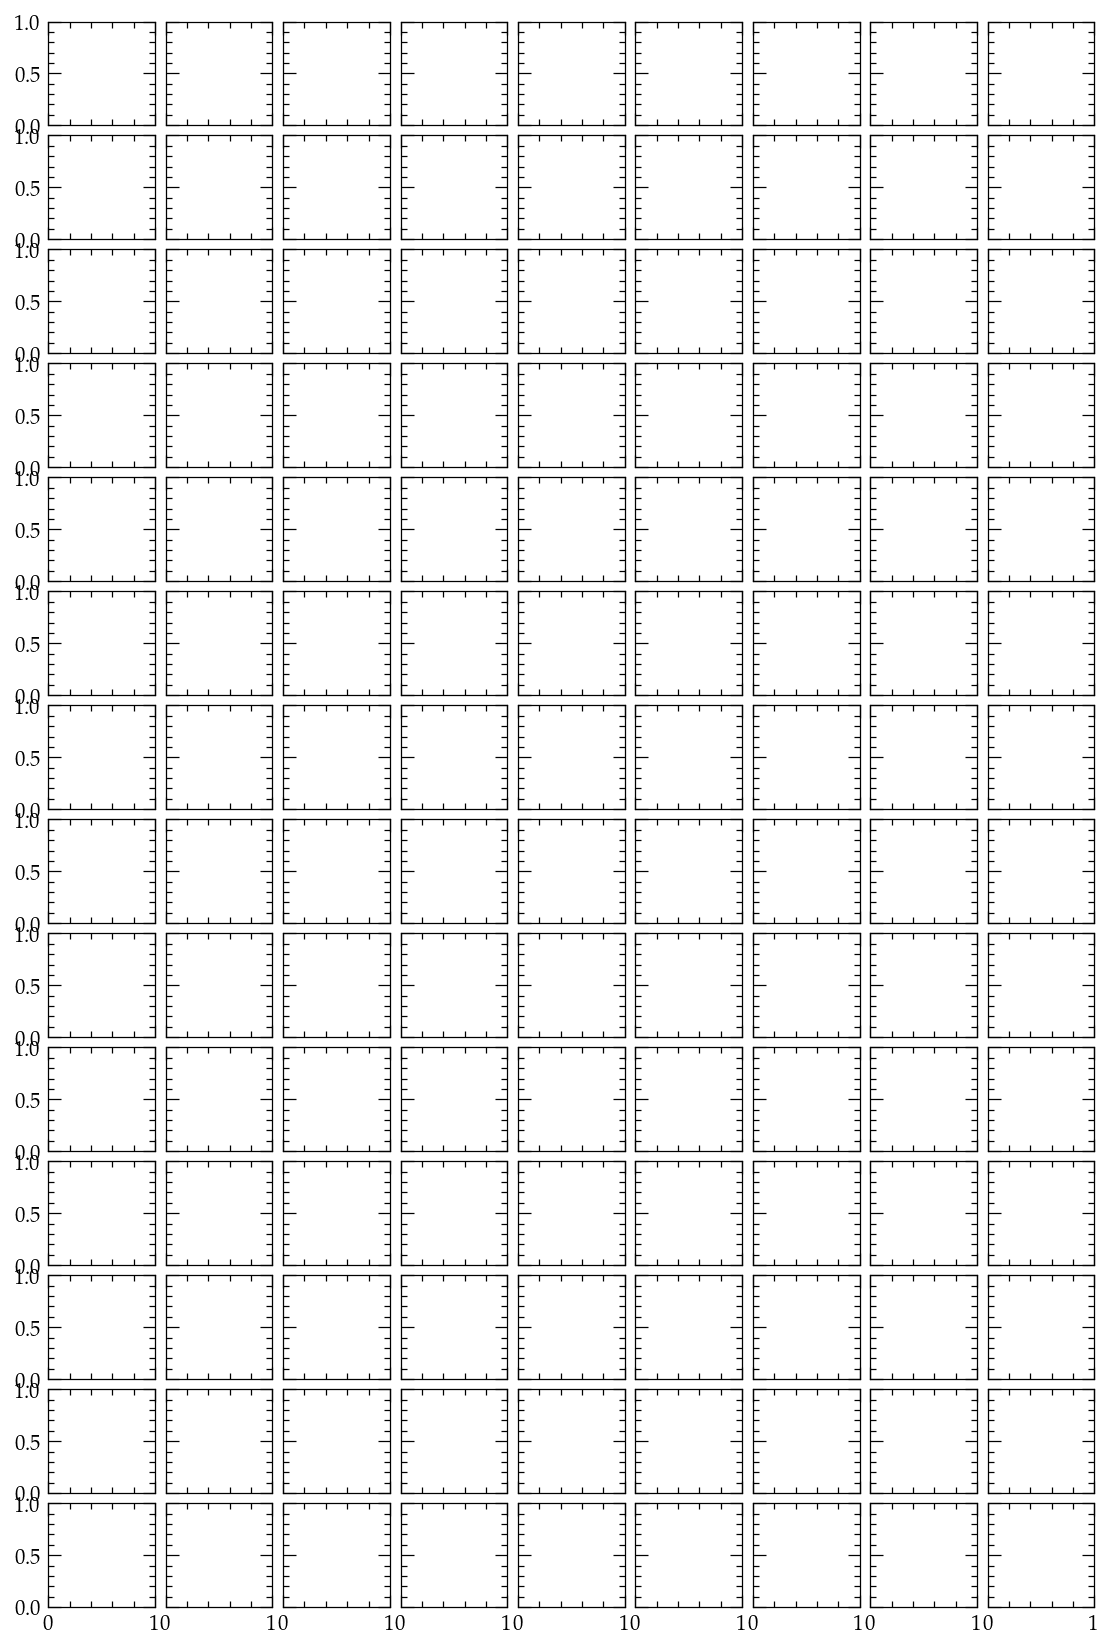

In [28]:
variation = "btagSF"

bins = [
    150, 175, 200, 250, 310, 370, 430, 510,
    590, 690, 790, 900, 1020, 1160,
]
ncols = 9
nrows = len(bins)
size = 1

fig, ax = plt.subplots(
    figsize=(ncols*size, nrows*size), dpi=150,
    nrows=nrows, ncols=ncols,
    sharex=True, sharey='row',
    gridspec_kw={"hspace":0.1, "wspace":0.1},
)

for row, binval in enumerate(bins):
    region_processes = [
        (f'MonojetQCD_{binval}', "ZJetsToNuNu"),
        (f'MonojetQCD_{binval}', "WJetsToLNu"),
        (f'MonojetQCD_{binval}', "MinorBkgs"),
        (f'MonojetQCD_{binval}', "QCD"),
        (f'SingleMuonQCD_{binval}', "WJetsToLNu"),
        (f'SingleMuonQCD_{binval}', "MinorBkgs"),
        (f'SingleMuonQCD_{binval}', "QCD"),
        (f'SingleElectronQCD_{binval}', "WJetsToLNu"),
        (f'SingleElectronQCD_{binval}', "MinorBkgs"),
    ]
    nvars = len(region_processes)

    for col, (region, process) in enumerate(region_processes):
        nom = df_mc_fit.loc[(region, process, "")]
        vari_up = df_mc_fit.loc[(region, process, "{}Up".format(variation))]
        vari_up_smooth = df_mc_fit_smooth.loc[(region, process, "{}Up".format(variation))]
        vari_up_pol = df_mc_fit_pol4.loc[(region, process, "{}Up".format(variation))]
        vari_do = df_mc_fit.loc[(region, process, "{}Down".format(variation))]
        vari_do_smooth = df_mc_fit_smooth.loc[(region, process, "{}Down".format(variation))]
        vari_do_pol = df_mc_fit_pol4.loc[(region, process, "{}Down".format(variation))]
        
        draw(
            ax[row,col],
            vari_up/nom-1, vari_up_smooth/nom-1, vari_up_pol/nom-1,
            vari_do/nom-1, vari_do_smooth/nom-1, vari_do_pol/nom-1,
            title="",
        )
        ax[row, col].set_ylim(-0.2, 0.2)
        ax[row, col].tick_params(axis='both', which='major', labelsize=5)
        if col==0:
            ax[row,col].set_ylabel(binval, fontsize=6)
        if row==0:
            ax[row,col].set_title(region.split("_")[0], fontsize=6)
        if row==len(bins)-1:
            ax[row,col].set_xlabel(process, fontsize=6)

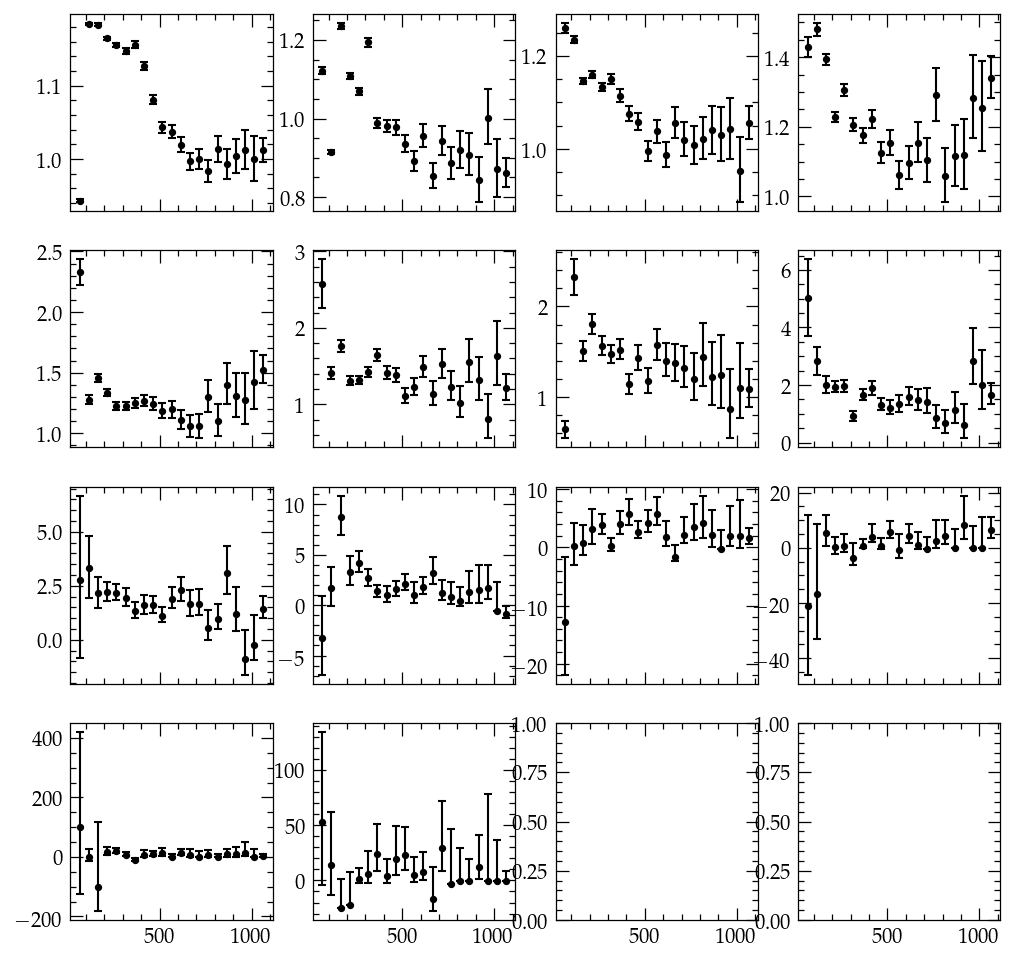

In [28]:
regions = (
    "MonojetQCD_150", "MonojetQCD_175", "MonojetQCD_200", "MonojetQCD_250", "MonojetQCD_310", "MonojetQCD_370", "MonojetQCD_430", "MonojetQCD_510", "MonojetQCD_590",
    "MonojetQCD_690", "MonojetQCD_790", "MonojetQCD_900", "MonojetQCD_1020", "MonojetQCD_1160",
)

fig, ax = plt.subplots(
    figsize=(8, 2*len(regions)//4+1), dpi=150,
    nrows=len(regions)//4+1, ncols=4,
    sharex=True, sharey=False,
)

for idx, region in enumerate(regions):
    mc = df_mc_fit.loc[(region, pd.IndexSlice[:], ""),:]
    data = df_data_fit.loc[("MET", region),"sum_w"]
    
    row = idx//4
    col = idx%4
    if len(regions)<5:
        tax = ax[col]
    else:
        tax = ax[row,col]
        
    bin_min = data.index.get_level_values("bin_min").values
    bin_max = data.index.get_level_values("bin_max").values
    lower, upper = dftools.stats.poisson_interval(data)
    
    not_qcd = (mc.index.get_level_values("process")!="QCD")
    bkg = mc.loc[not_qcd].groupby(["bin_min", "bin_max"]).sum()["sum_w"]
    qcd = mc.loc[~not_qcd].groupby(["bin_min", "bin_max"]).sum()["sum_w"]
    
    nom = (data-bkg)/qcd
    up = (upper-bkg)/qcd
    do = (lower-bkg)/qcd
    
    tax.errorbar(
        (bin_min+bin_max)/2.,
        nom, yerr=(nom-do, up-nom),
        fmt='o', color='black',
    )